# Imports

In [20]:
import numpy as np
import tensorflow as tf
import pandas as pd
import keras
from keras.optimizers import Adadelta
import matplotlib.pyplot as plt
from pathlib import Path

## Import Data

In [21]:
data_train = pd.read_csv('../data/trump/train_rounds_filtered_merged.csv', header=None)
data_test = pd.read_csv('../data/trump/test_rounds_filtered_merged.csv', header=None)

cards = [
# Diamonds
'DA','DK','DQ','DJ','D10','D9','D8','D7','D6',
# Hearts
'HA','HK','HQ','HJ','H10','H9','H8','H7','H6',
# Spades
'SA','SK','SQ','SJ','S10','S9','S8','S7','S6',
# Clubs
'CA','CK','CQ','CJ','C10','C9','C8','C7','C6'
]

forehand = ['forehand']

trump = ['trump']

In [22]:
print(f'Train Data: {data_train.shape}, Test Data: {data_test.shape}')

Train Data: (7271, 38), Test Data: (2310, 38)


In [3]:
# data_train
data_train.columns = cards + forehand + trump
data_train.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CK,CQ,CJ,C10,C9,C8,C7,C6,forehand,trump
0,0,1,0,0,1,0,0,1,1,0,...,0,0,0,1,1,0,0,1,0,5
1,0,1,0,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,0,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,1,0,0,0,0,2


In [4]:
# data_test
data_test.columns = cards + forehand + trump
data_test.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CK,CQ,CJ,C10,C9,C8,C7,C6,forehand,trump
0,0,0,1,0,0,0,0,0,0,1,...,0,1,1,1,1,1,0,0,0,3
1,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,6
2,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,6
3,0,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,4


add data column with NrD, NrH, NrS, NrC, NrA, Nr6

In [5]:
data_train.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CK,CQ,CJ,C10,C9,C8,C7,C6,forehand,trump
0,0,1,0,0,1,0,0,1,1,0,...,0,0,0,1,1,0,0,1,0,5
1,0,1,0,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,0,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,1,0,0,0,0,2


In [6]:
data_test.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CK,CQ,CJ,C10,C9,C8,C7,C6,forehand,trump
0,0,0,1,0,0,0,0,0,0,1,...,0,1,1,1,1,1,0,0,0,3
1,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,6
2,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,6
3,0,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,4


In [7]:
# x_train = data_train.filter(items=['DJ', 'D9', 'HJ', 'H9', 'SJ', 'S9', 'CJ', 'C9', 'NrD', 'NrH', 'NrS', 'NrC', 'NrA', 'Nr6']) 
x_train = data_train.drop('trump', axis='columns', inplace=False)
# x_train = data_train
x_train.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CA,CK,CQ,CJ,C10,C9,C8,C7,C6,forehand
0,0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,1,1,0,0,1,0
1,0,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,1,0,0,0,0


In [8]:
# x_test = data_test.filter(items=['DJ', 'D9', 'HJ', 'H9', 'SJ', 'S9', 'CJ', 'C9', 'NrD', 'NrH', 'NrS', 'NrC', 'NrA', 'Nr6']) 
x_test = data_test.drop('trump', axis='columns', inplace=False)
# x_test = data_test
x_test.head()

,DA,DK,DQ,DJ,D10,D9,D8,D7,D6,HA,...,CA,CK,CQ,CJ,C10,C9,C8,C7,C6,forehand
0,0,0,1,0,0,0,0,0,0,1,...,0,0,1,1,1,1,1,0,0,0
1,0,0,0,1,0,0,0,1,0,1,...,1,0,0,0,0,0,1,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
3,0,1,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [9]:
#V2
y_train_label = data_train['trump']
y_train = keras.utils.to_categorical(y_train_label, num_classes=7)

model = keras.Sequential()
model.add(keras.layers.Dense(37, activation='relu', input_shape=[37]))
model.add(keras.layers.Dense(28, activation='relu'))
model.add(keras.layers.Dense(22, activation='relu'))
model.add(keras.layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd', #'rmsprop', 'sgd', Adadelta()
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=100, batch_size=300, shuffle=True)

Epoch 1/100
1187/1187 [==============================] - 0s 159us/step - loss: 1.9860 - accuracy: 0.1104
Epoch 2/100
1187/1187 [==============================] - 0s 12us/step - loss: 1.9779 - accuracy: 0.1112
Epoch 3/100
1187/1187 [==============================] - 0s 19us/step - loss: 1.9702 - accuracy: 0.1129
Epoch 4/100
1187/1187 [==============================] - 0s 26us/step - loss: 1.9629 - accuracy: 0.1179
Epoch 5/100
1187/1187 [==============================] - 0s 19us/step - loss: 1.9559 - accuracy: 0.1238
Epoch 6/100
1187/1187 [==============================] - 0s 17us/step - loss: 1.9494 - accuracy: 0.1331
Epoch 7/100
1187/1187 [==============================] - 0s 14us/step - loss: 1.9431 - accuracy: 0.1432
Epoch 8/100
1187/1187 [==============================] - 0s 17us/step - loss: 1.9371 - accuracy: 0.1660
Epoch 9/100
1187/1187 [==============================] - 0s 10us/step - loss: 1.9313 - accuracy: 0.1862
Epoch 10/100
1187/1187 [==============================] - 0s 16

1187/1187 [==============================] - 0s 16us/step - loss: 1.7726 - accuracy: 0.3799
Epoch 80/100
1187/1187 [==============================] - 0s 17us/step - loss: 1.7720 - accuracy: 0.3799
Epoch 81/100
1187/1187 [==============================] - 0s 12us/step - loss: 1.7715 - accuracy: 0.3799
Epoch 82/100
1187/1187 [==============================] - 0s 21us/step - loss: 1.7709 - accuracy: 0.3799
Epoch 83/100
1187/1187 [==============================] - 0s 16us/step - loss: 1.7704 - accuracy: 0.3799
Epoch 84/100
1187/1187 [==============================] - 0s 16us/step - loss: 1.7699 - accuracy: 0.3799
Epoch 85/100
1187/1187 [==============================] - 0s 10us/step - loss: 1.7694 - accuracy: 0.3799
Epoch 86/100
1187/1187 [==============================] - 0s 16us/step - loss: 1.7690 - accuracy: 0.3799
Epoch 87/100
1187/1187 [==============================] - 0s 14us/step - loss: 1.7686 - accuracy: 0.3799
Epoch 88/100
1187/1187 [==============================] - 0s 13us/st

In [10]:
model.summary()
print(model.get_weights())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 37)                1406      
_________________________________________________________________
dense_2 (Dense)              (None, 28)                1064      
_________________________________________________________________
dense_3 (Dense)              (None, 22)                638       
_________________________________________________________________
dense_4 (Dense)              (None, 7)                 161       
Total params: 3,269
Trainable params: 3,269
Non-trainable params: 0
_________________________________________________________________
[array([[-0.17719054, -0.10653893,  0.05801954, ..., -0.15651952,
        -0.2597629 ,  0.05257107],
       [-0.24011114, -0.21199329, -0.1617637 , ...,  0.19282784,
         0.14977872, -0.01571771],
       [ 0.22595209, -0.00751773,  0.27338296, ..

Text(0, 0.5, 'loss')

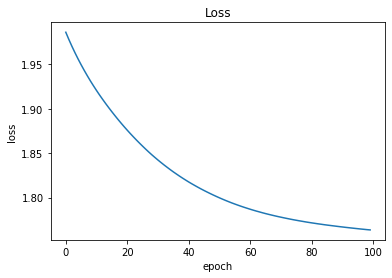

In [11]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')

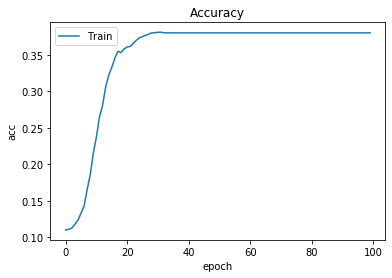

In [12]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

In [13]:
history.history['accuracy'][-1]

0.37994945

# Predict

In [14]:
y_pred = model.predict(x_test)
# print(y_pred)

In [15]:
TOTAL_COUNT = len(x_test)
CORRECT_COUNT = 0

for i in range(0,len(y_pred)):
    global CORRECT_TRUMP
    
    predicted_trump = np.where(y_pred[i] == np.amax(y_pred[i]))[0][0]
    real_trump = data_test.iloc[i]['trump']
    
    #print(predicted_trump)
    #print(real_trump)
    
    if int(predicted_trump) == int(real_trump):
        CORRECT_COUNT = CORRECT_COUNT + 1

In [16]:
accuracy = (CORRECT_COUNT / TOTAL_COUNT) * 100
print(f'Total Count   : {TOTAL_COUNT}')
print(f'Correct Count : {CORRECT_COUNT}')
print(f'Accuracy      : {accuracy}')

Total Count   : 346
Correct Count : 121
Accuracy      : 34.971098265895954


### Versions

| Version | CSV | epoch | Batch size | Layers                                     | Loss   | AccTrain | AccTest | FH |
| ------- | --- | ----- | ---------- | ------------------------------------------ | ------ | -------- | ------- | ---
| V0      | 1   | 100   | 2500       | 9 relu & 1 softmax                         | 0.89   | 0.61     | 0.615   | No
| V1      | 1   | 100   | 1000       | 9 relu & 1 softmax                         | 0.8309 | 0.6365   | 0.6344  | No
| V2      | 1   | 100   | 150        | 1 relu (16) & 1 softmax                    | 0.8727 | 0.6369   | 0.6236  | No
| V3      | 1   | 100   | 150        | 2 relu (22 (dropout(0.1), 16) & 1 softmax  | 0.8972 | 0.6273   | 0.6293  | No
| V4      | 1   | 100   | 150        | 2 relu (22, 16) & 1 softmax                | 0.8620 | 0.6396   | 0.6295  | No
| V5      | 1   | 100   | 150        | 3 relu (36, 22, 16) & 1 softmax            | 0.8551 | 0.6428   | 0.6205  | No
| V6      | 1   | 100   | 150        | 3 relu (35, 28, 21, 14) & 1 softmax        | 0.8489 | 0.6446   | 0.6226  | No
| V7      | 1   | 100   | 300        | 2 relu (22, 16) & 1 softmax                | 0.8850 | 0.6307   | 0.6210  | No
| V8      | 1   | 100   | 300        | 2 relu (28, 22) & 1 softmax                | 0. | 0.   | 0.  | Yes

In [17]:
#Save the model in MlBasedPlayer
import datetime

version = "V8"
datetime = datetime.datetime.now().isoformat()

model.save_weights(f'../models/trump_prediction_model_{version}.h5')
